# Census income project:

# Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# importing dataset:

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file from dataset
df=pd.read_csv('Censum_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


above dataset contains the details of the annual income of the persons.we need to predict whether the income of the person is over $50k per year or not. In the dataset "Income" is the target variable and it is a Classification problem

# EDA

In [3]:
# Checking the dimension of dataset 
df.shape

(32560, 15)

this dataset contains 32560 rows and 15 column

In [4]:
# Checking the type of dataset
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

this dataset contains int and object data type

In [5]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


This dataset gives the information about the dataset which includes indexing type, column type, no-null values and memory usage.

In [6]:
#Checking unique values of each column
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

these are the unique values present in each column

In [7]:
# Checking null values in the dataframe
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

there are no missing values present in it.

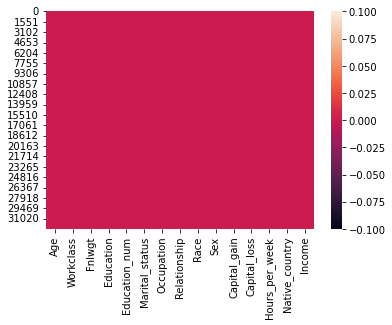

In [8]:
#Visualizeing null values
sns.heatmap(df.isnull())
plt.show()

by visualization there is no missing values present in it.

In [9]:
# Checking how many columns are there in the dataset
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

these are the column present in the dataset

In [10]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
****************************************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
****************************************
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
****************************************
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              4

Here ,the columns capital gain and capital loss have more than 90% of zeroes and it is not required for our prediction. Let's drop them.

In [11]:
# Dropping the columns having more number of 0's
df.drop("Capital_gain",axis=1,inplace=True)
df.drop("Capital_loss",axis=1,inplace=True)

# Filling '?' values

There are some '?' entries in Workclass, Occupation and Native_country column. we will fill "?" values with most frequently occuring values of the respective columns that is their mode values.

In [12]:
df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

In [13]:
df["Workclass"].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [14]:
df["Occupation"].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [15]:
df["Native_country"].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

# Feature engineering

Most of the columns have unique type of classes, let's replace them with the new classes.

In [16]:
df.Workclass=df.Workclass.replace([' Local-gov',' State-gov',' Federal-gov'],' Govt-Sector')
df.Workclass=df.Workclass.replace([' Private',' Self-emp-not-inc',' Self-emp-inc'],' Pvt-sector')
df.Workclass=df.Workclass.replace([' Without-pay',' Never-worked'],'Not-working')

In [17]:
df["Workclass"].value_counts()

 Pvt-sector     28189
 Govt-Sector     4350
Not-working        21
Name: Workclass, dtype: int64

In [18]:
df["Education"]=df["Education"].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],'School')
df["Education"]=df["Education"].replace([' HS-grad',' Prof-school'],' High-School')
df["Education"]=df["Education"].replace([' Some-college',' Assoc-voc',' Assoc-acdm'],' Secondary-School')
df["Education"]=df["Education"].replace([' Bachelors',],' Under_Graduation')
df["Education"]=df["Education"].replace([' Masters'],'Post_Graduation')
df["Education"]=df["Education"].replace([' Doctorate'],' PhD')

In [19]:
df["Education"].value_counts()

 High-School         11077
 Secondary-School     9740
 Under_Graduation     5354
School                4253
Post_Graduation       1723
 PhD                   413
Name: Education, dtype: int64

In [20]:
df["Marital_status"]=df["Marital_status"].replace([' Married-civ-spouse',' Married-AF-spouse'],' Married')
df["Marital_status"]=df["Marital_status"].replace([' Never-married'],' Single')
df["Marital_status"]=df["Marital_status"].replace([' Divorced',' Widowed',' Separated',' Married-spouse-absent',],' Others')

In [21]:
df["Marital_status"].value_counts()

 Married    14999
 Single     10682
 Others      6879
Name: Marital_status, dtype: int64

In [22]:
# Let's check the dataframe 
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [23]:
# Checking the list of value counts in Income
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

There are two unique values in the target column <=50K and >50K. And data is not balanced.

In [24]:
# Checking wheather the dataset contains any space
df.loc[df['Income']==" "]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income


there is no spaces in the dataset from the above.

In [25]:
# Statistical summary of dataset
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


This gives the statistical information of the dataset.

In [26]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


these are the categorical columns present in the dataset

In [27]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


these are the numerical columns present in the dataset

# data visualization

# Univariate Analysis

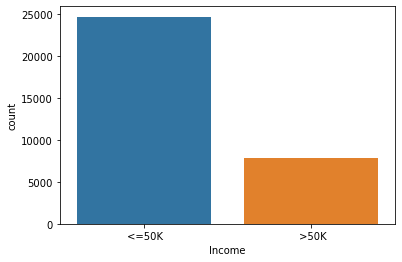

In [28]:
#Count plot for Income
sns.countplot(df['Income']);

Most of the people have the income less than or equal to 50K. We can also observe that data imbalance issue.

<AxesSubplot:xlabel='Workclass', ylabel='count'>

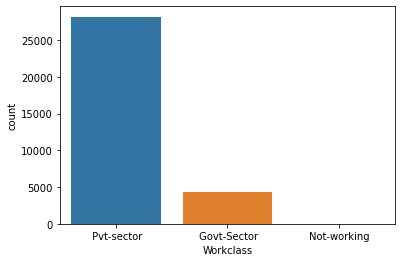

In [29]:
#Count plot for Workclass
sns.countplot(df['Workclass'])

The count of Private work class is high compare to others. This means the people working in private sectors are have high count and the people who never worked have least count.

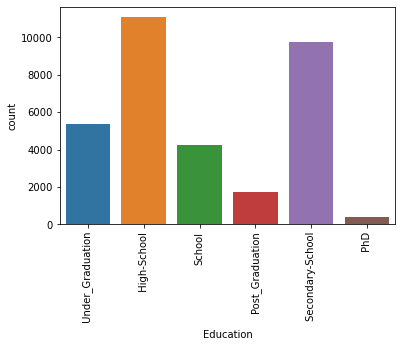

In [30]:
#Count plot for Education
sns.countplot(df['Education'])
plt.xticks(rotation=90)
plt.show()

The count of High-School is high followed by Secondary-School. Most of the people have their High School graduation with count more than 10K and the count of PhD is very less compare to others.

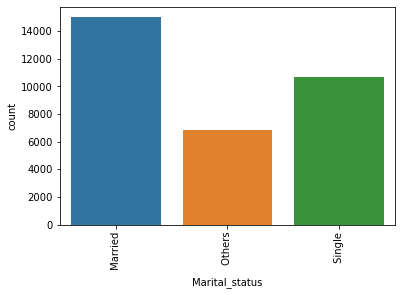

In [31]:
#Count plot for Marital_status
sns.countplot(df["Marital_status"])
plt.xticks(rotation=90)
plt.show()

 from the above The people who got married have high counts followed by the Singles or never married people.

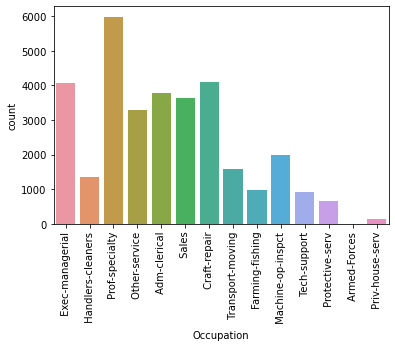

In [32]:
#count plot for Occupation
sns.countplot(df["Occupation"])
plt.xticks(rotation=90)
plt.show()

 from the above The people who are in the position of Prof-speciality have highest count and the people in the position Armed-Forces have very least counts.

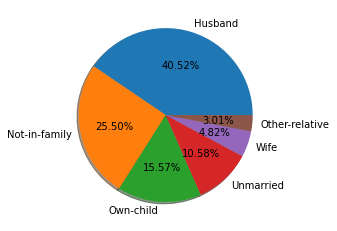

In [33]:
#Ploting pie chart for Relationship
df["Relationship"].value_counts()
labels='Husband','Not-in-family','Own-child','Unmarried','Wife','Other-relative'
fig, ax = plt.subplots()
ax.pie(df['Relationship'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

By looking into the pie chart most of the count is with Husband, Not-in-family and own-child.

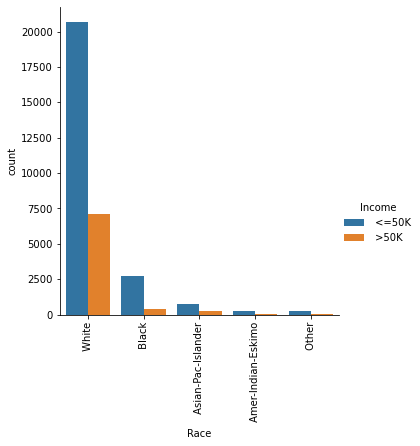

In [34]:
#Factor plot for Race
sns.factorplot('Race',kind='count',data=df,hue='Income')
plt.xticks(rotation=90);

 from the above US white people have more chance of getting job than any other raced people.

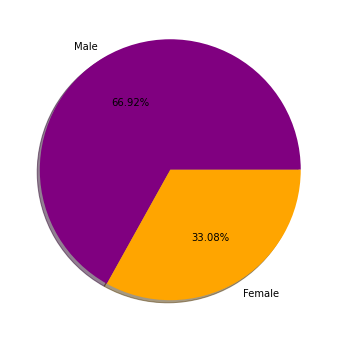

In [35]:
# Visualize the count of Sex group of the people
labels='Male','Female'
fig, ax = plt.subplots(figsize=(8,6))
colors = ["purple","orange"]
ax.pie(df['Sex'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.show()

The count of Male is high and has around 66% and only 33% of females are there.

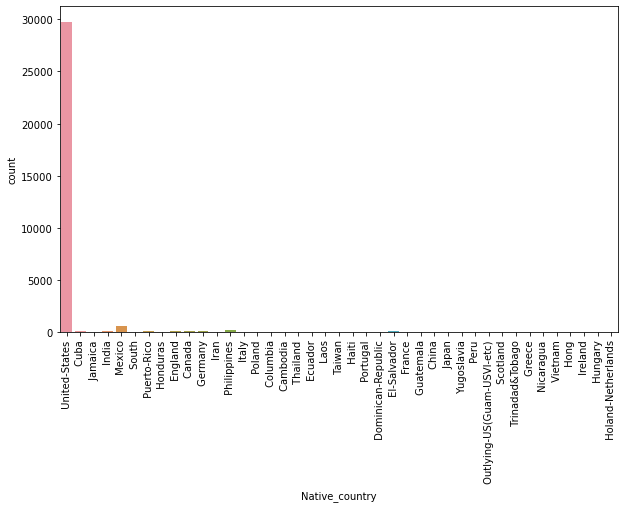

In [36]:
# Visualizing the Native country of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Native_country"])
plt.xticks(rotation=90)
plt.show()

The United States country has highest count of around 29K and other countries have very less counts.

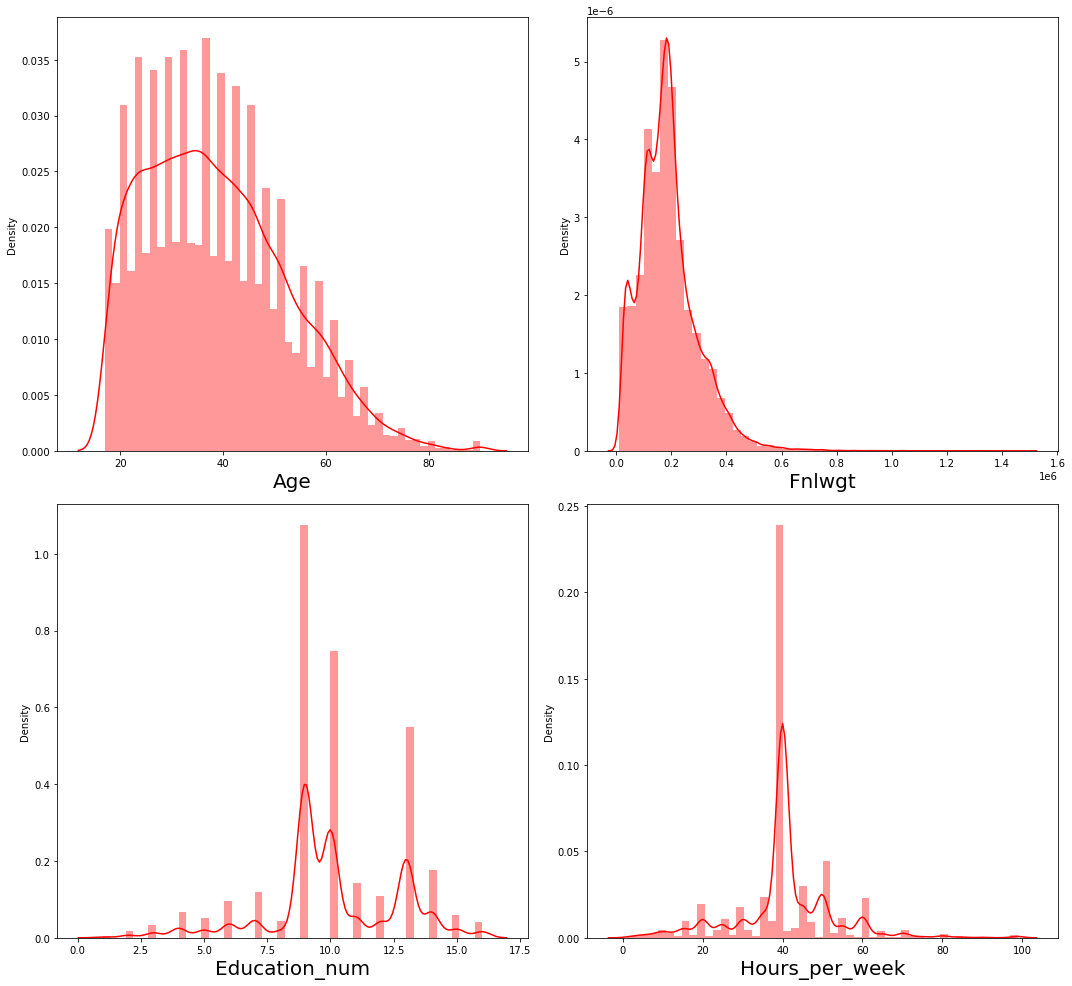

In [37]:
# Checking how the data has been distriubted in each numerical column

plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[column],color="red")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

All the numerical columns are skewed but skewness is less in Age column.

# Bivariate Analysis

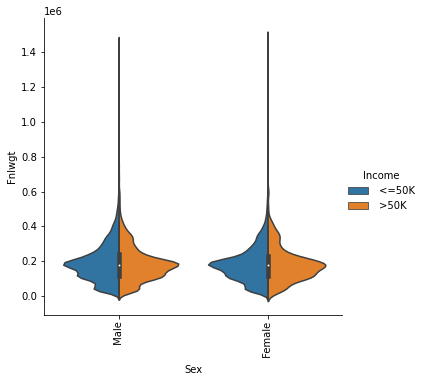

In [38]:
# Let's plot catplot for Sex and Fnlwgt
sns.catplot(x = "Sex", y = "Fnlwgt", hue = "Income", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Both for male and female the Fnlwgt is same and they have same income also.

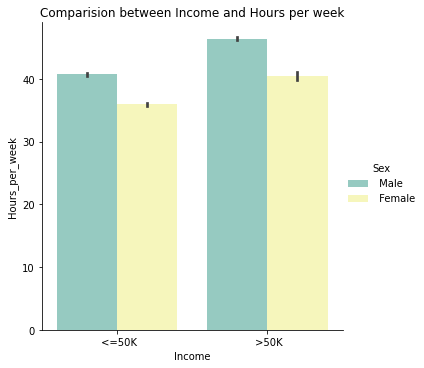

In [39]:
# Visualizing the number of Hours per week with income
sns.catplot(x='Income',y='Hours_per_week', data=df,kind='bar',hue="Sex",palette="Set3");
plt.title('Comparision between Income and Hours per week')
plt.show()

This shows how the income is related to the hours per week. The income is >50K when the Hours is high for both male and female.

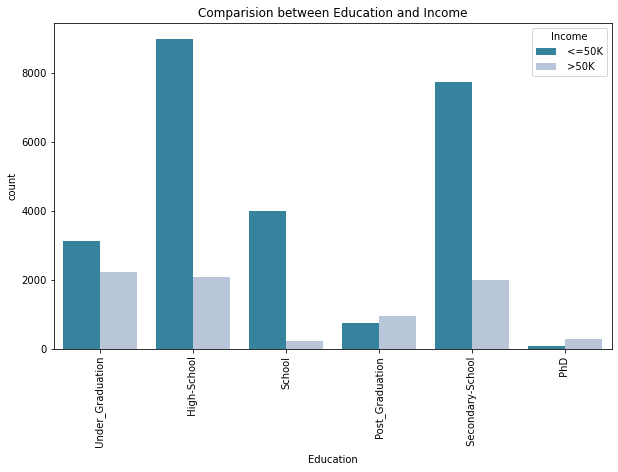

In [40]:
# Visualizing the relation between Education and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Education"],hue=df["Income"],palette="PuBuGn_r" )
plt.title("Comparision between Education and Income")
plt.xticks(rotation=90)
plt.show()

The people who completed theie high school have income <=50K followed by the people who done their Secondary School. Also the people who done their Graduation they are earning more income that is >50K.

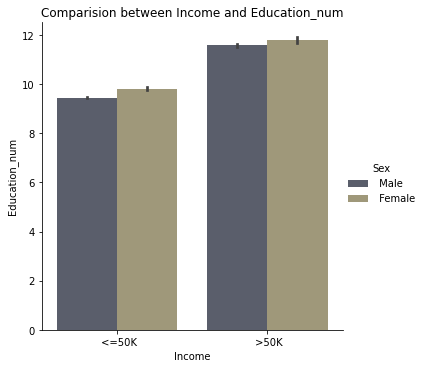

In [41]:
# Visualizing the number of education with income
sns.catplot(x='Income',y='Education_num', data=df,kind='bar',hue="Sex",palette="cividis")
plt.title('Comparision between Income and Education_num')
plt.show()

The Income is more than 50K for the people having high education number. Here both gender have the income more than 50K.

<Figure size 720x432 with 0 Axes>

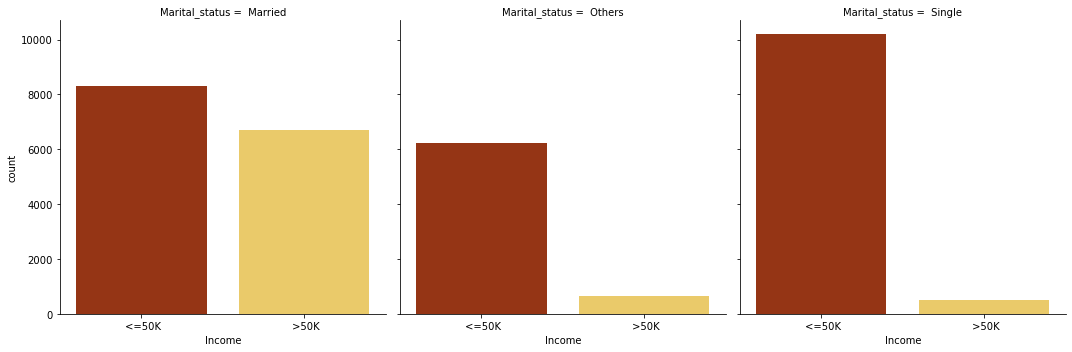

In [42]:
# Visualizing the relation between Marital status and Income of the people
plt.figure(figsize=(10,6))
sns.catplot(x='Income',col='Marital_status',data=df,kind='count',palette="afmhot")
plt.show()

Married people getting income >50K compare to others. and more people who are Singles those getting <=50K.

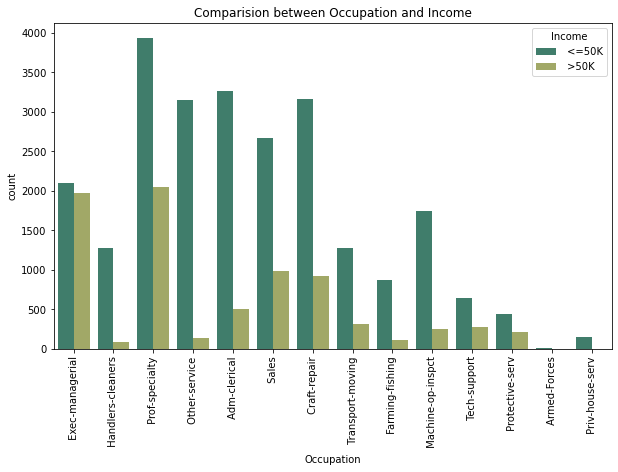

In [43]:
# Visualizing the relation between Occupation and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Occupation"],hue=df["Income"],palette="gist_earth" )
plt.title("Comparision between Occupation and Income")
plt.xticks(rotation=90)
plt.show()

The people in the position Prof-speciality and Exce-managerial have the income more than 50K.
Also the people who are in the position Prof_Speciality, Other services, Adm-clerical and craft repair they have income less than 50K.

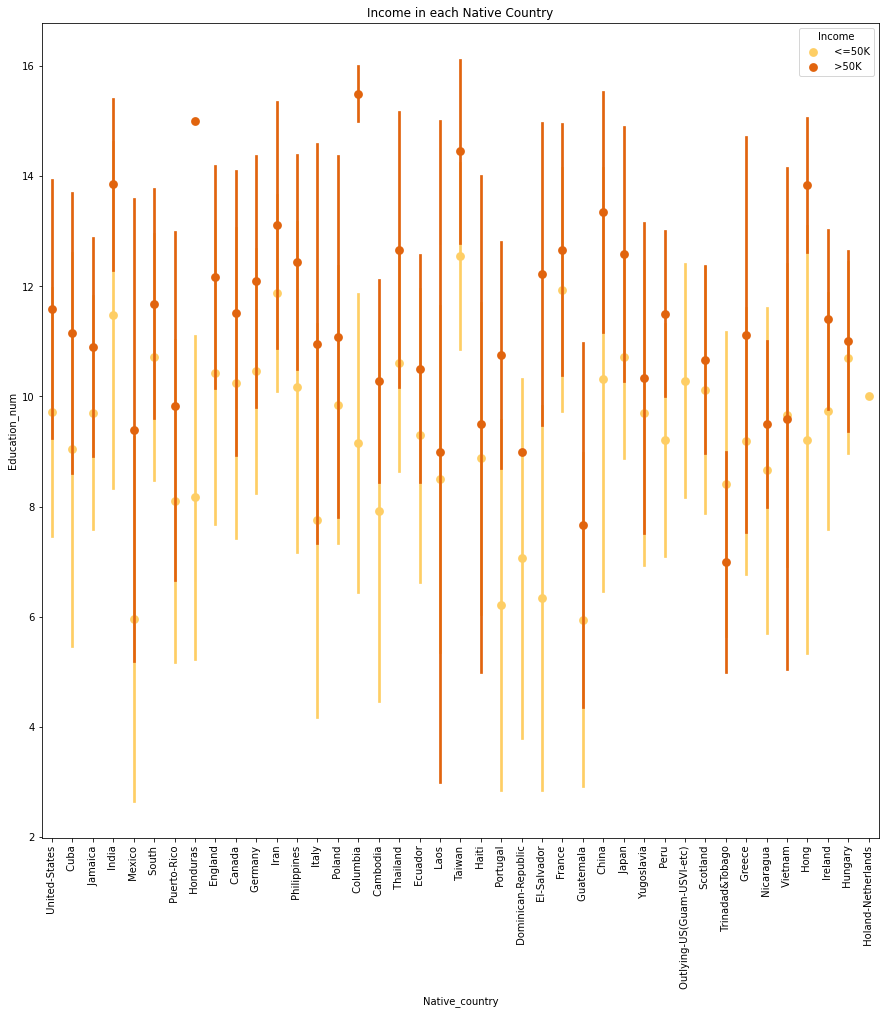

In [44]:
# Visualizing how the income changes for Native country of the people
plt.figure(figsize=(15,15))
plt.title("Income in each Native Country")
sns.pointplot(x='Native_country',y='Education_num',data=df, hue='Income',join=False,palette="YlOrBr",ci="sd")
plt.xticks(rotation=90)
plt.show()

The countries having high education numbers have high income that is more than 50K.

# Multivariate Analysis

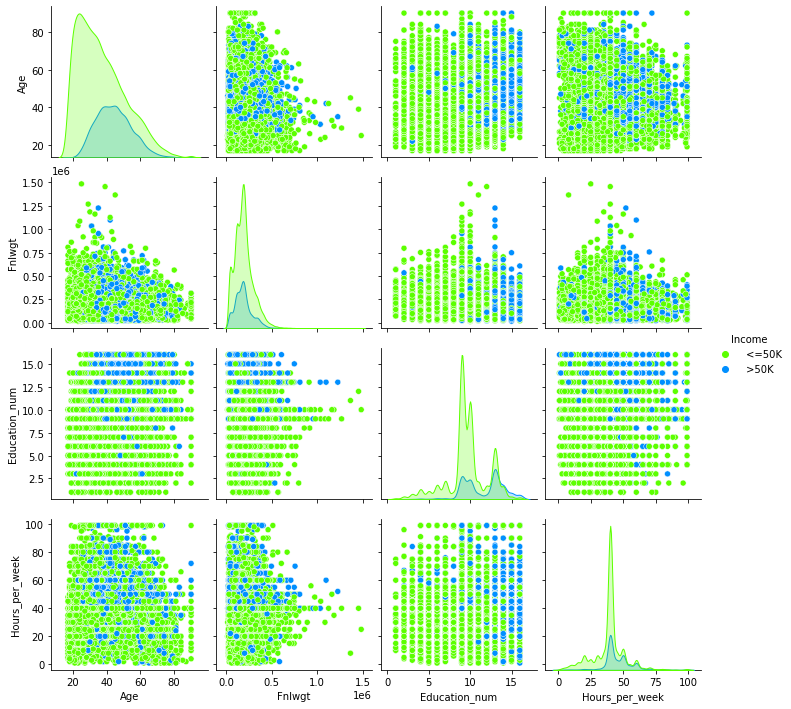

In [45]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Income",palette="gist_rainbow")

Above are the pair plots of df.And there are some extreme outliers in the dataset.And some skewness also present.

# Identifying the outliers

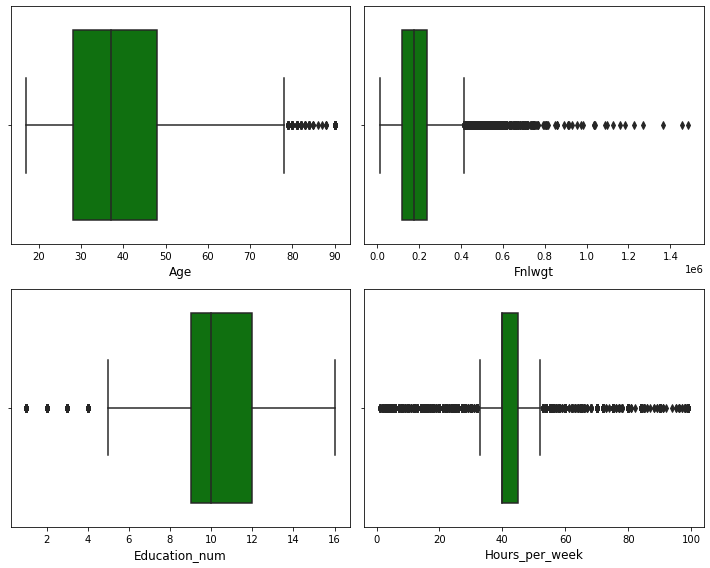

In [46]:
# Identifying the outliers using boxplot

plt.figure(figsize=(10,8),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color="g")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

Outliers present in all the numerical columns.

# Removing outliers

i) Zscore method

In [47]:
# Features containing outliers
features = df[["Age","Fnlwgt","Education_num","Hours_per_week"]]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,Age,Fnlwgt,Education_num,Hours_per_week
0,0.837097,1.008742,1.134779,2.222120
1,0.042640,0.245046,0.420027,0.035430
2,1.057031,0.425770,1.197429,0.035430
3,0.775755,1.408146,1.134779,0.035430
4,0.115952,0.898170,1.523480,0.035430
...,...,...,...,...
32555,0.849066,0.639710,0.746077,0.197407
32556,0.103982,0.335466,0.420027,0.035430
32557,1.423589,0.358811,0.420027,0.035430
32558,1.215624,0.110927,0.420027,1.655200


In [48]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Pvt-sector,257302,Secondary-School,12,Married,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Pvt-sector,154374,High-School,9,Married,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Pvt-sector,151910,High-School,9,Others,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Pvt-sector,201490,High-School,9,Single,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [49]:
# Shape of original dataset
df.shape

(32560, 13)

Before removing the outliers we had 32560 rows and 13 columns in our dataset.

In [50]:
#Shape of new dataframe
new_df.shape

(31461, 13)

After removing the outliers we have 31461 rows and 13 columns.

In [51]:
# Checking the the data loss
data_loss = (32560-31461)/36560*100
data_loss

3.0060175054704596

Here we are losing only 3% data by zscore method.

# ii) IQR (Inter Quantile Range) method

In [52]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [53]:
df1.shape

(21950, 13)

Using IQR method the dataframe has 21950 rows and 13 column

In [54]:
# Checking the the data loss
data_loss = (32560-21950)/36560*100
data_loss


29.02078774617068

Using IQR method I am losing 29% of data, so considering Zscore method.

# Checking the skewness

In [55]:
# Checking the skewness
new_df.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

# Removing skewness

In [56]:
# Removing skewness using cube root method
new_df["Fnlwgt"] = np.cbrt(df["Fnlwgt"])

In [57]:
new_df.skew()

Age               0.472279
Fnlwgt           -0.376609
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

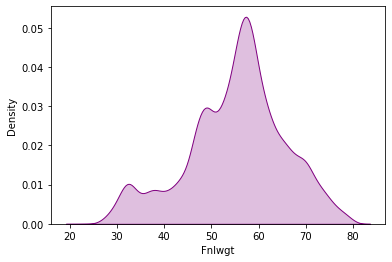

In [58]:
sns.distplot(new_df["Fnlwgt"],color="purple",kde_kws={"shade": True},hist=False)

The data is almost normal and has no skewness.

# Encoding the categorical columns using Label Encoding

In [59]:
categorical_col = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [60]:
new_df[categorical_col]

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,1,3,0,3,0,4,1,38,0
1,1,0,1,5,1,4,1,38,0
2,1,5,0,5,0,2,1,38,0
3,1,3,0,9,5,2,0,4,0
4,1,4,0,3,5,4,0,38,0
...,...,...,...,...,...,...,...,...,...
32555,1,2,0,12,5,4,0,38,0
32556,1,0,0,6,0,4,1,38,1
32557,1,0,1,0,4,4,0,38,0
32558,1,0,2,0,3,4,1,38,0


# Correlation between the target variable and independent variables using HEAT map

In [61]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,-0.083618,-0.062328,-0.009682,0.053361,-0.476050,-0.001321,-0.268028,0.030679,0.091664,0.097510,-0.001039,0.248351
Workclass,-0.083618,1.000000,0.021707,-0.035701,-0.161488,0.034265,0.005610,0.001008,0.051670,0.036158,-0.006349,-0.031665,-0.062963
Fnlwgt,-0.062328,0.021707,1.000000,0.007806,-0.031874,0.030462,0.001524,0.009060,-0.006959,0.023307,-0.015820,-0.061390,-0.002780
Education,-0.009682,-0.035701,0.007806,1.000000,-0.052888,0.037934,0.068764,0.001954,-0.005373,0.001626,-0.053121,-0.073192,0.034278
Education_num,0.053361,-0.161488,-0.031874,-0.052888,1.000000,-0.071406,0.073927,-0.102497,0.030849,0.016662,0.160483,0.054510,0.337595
Marital_status,-0.476050,0.034265,0.030462,0.037934,-0.071406,1.000000,0.001052,0.451130,-0.081701,-0.336209,-0.241789,0.009096,-0.425904
Occupation,-0.001321,0.005610,0.001524,0.068764,0.073927,0.001052,1.000000,-0.037549,-0.004094,0.047864,-0.019943,-0.003666,0.034612
Relationship,-0.268028,0.001008,0.009060,0.001954,-0.102497,0.451130,-0.037549,1.000000,-0.115216,-0.582940,-0.263412,-0.010871,-0.251506
Race,0.030679,0.051670,-0.006959,-0.005373,0.030849,-0.081701,-0.004094,-0.115216,1.000000,0.088642,0.045331,0.122051,0.072451
Sex,0.091664,0.036158,0.023307,0.001626,0.016662,-0.336209,0.047864,-0.582940,0.088642,1.000000,0.239039,0.002060,0.216665


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.

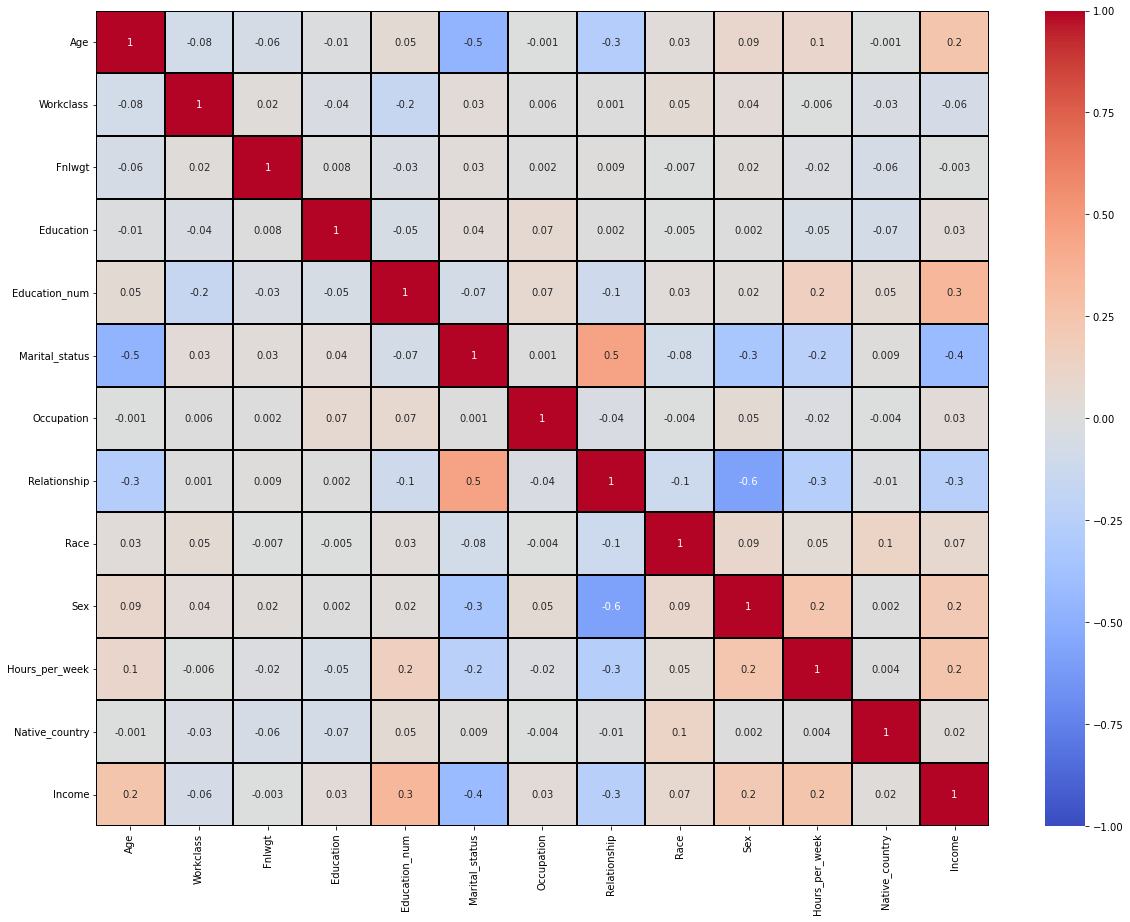

In [62]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

In [63]:
cor['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.337595
Age               0.248351
Hours_per_week    0.242383
Sex               0.216665
Race              0.072451
Occupation        0.034612
Education         0.034278
Native_country    0.017698
Fnlwgt           -0.002780
Workclass        -0.062963
Relationship     -0.251506
Marital_status   -0.425904
Name: Income, dtype: float64

# Visualizing the correlation between label and features using bar plot

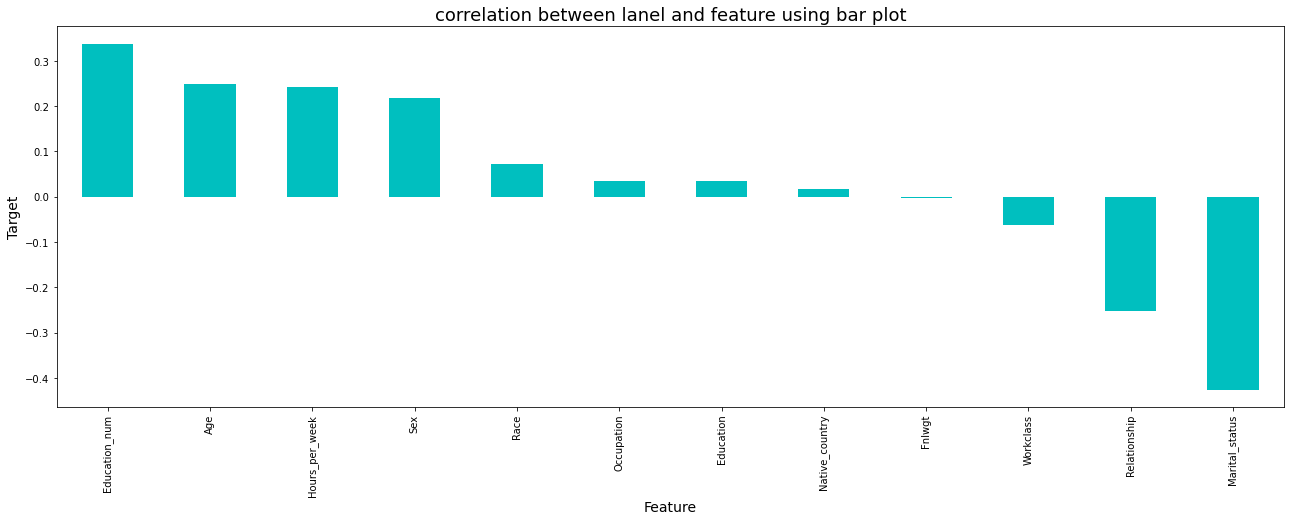

In [64]:
plt.figure(figsize=(22,7))
new_df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

The column Fnlwgt has very less correlation with the label so we can drop it if necessary.

# Separating the features and label variables into x and y

In [65]:
x = new_df.drop("Income", axis=1)
y = new_df["Income"]

In [66]:
# Dimension of x
x.shape

(31461, 12)

In [67]:
# Dimension of y
y.shape

(31461,)

# Scaling the data using standard scaler

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.875057,0.392103,-1.102052,0.621080,1.154324,-0.990371,-0.784335,-0.903178,0.391304,0.706601,-2.424121,0.254062
1,-0.025350,0.392103,0.464976,-1.149684,-0.459657,0.147158,-0.282327,-0.281938,0.391304,0.706601,-0.008364,0.254062
2,1.100158,0.392103,0.630260,1.801589,-1.266647,-0.990371,-0.282327,-0.903178,-1.969806,0.706601,-0.008364,0.254062
3,-0.775689,0.392103,1.399791,0.621080,1.154324,-0.990371,0.721690,2.203019,-1.969806,-1.415226,-0.008364,-5.457546
4,-0.100384,0.392103,1.023711,1.211335,1.557819,-0.990371,-0.784335,2.203019,0.391304,-1.415226,-0.008364,0.254062
...,...,...,...,...,...,...,...,...,...,...,...,...
31456,-0.850723,0.392103,0.814728,0.030825,0.750829,-0.990371,1.474703,2.203019,0.391304,-1.415226,-0.187309,0.254062
31457,0.124718,0.392103,-0.143169,-1.149684,-0.459657,-0.990371,-0.031323,-0.903178,0.391304,0.706601,-0.008364,0.254062
31458,1.475327,0.392103,-0.170768,-1.149684,-0.459657,0.147158,-1.537348,1.581780,0.391304,-1.415226,-0.008364,0.254062
31459,-1.225892,0.392103,0.335900,-1.149684,-0.459657,1.284688,-1.537348,0.960541,0.391304,0.706601,-1.797814,0.254062


In [69]:
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

Here we can notice the class imbalancing issue so lets use SMOTE to balance the data.

# Balancing the target variable using oversampling:

In [70]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

<AxesSubplot:xlabel='Income', ylabel='count'>

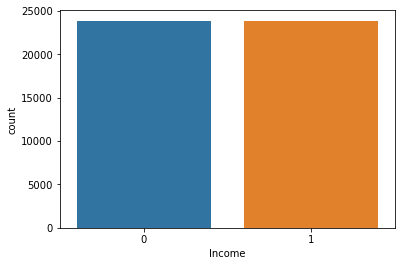

In [71]:
y.value_counts()
sns.countplot(y)

now , the data is balanced

In [72]:
# DataFrame after preprocessing and data cleaning
new_df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,1,43.675121,3,13,0,3,0,4,1,13,38,0
1,38,1,59.967204,0,9,1,5,1,4,1,40,38,0
2,53,1,61.685627,5,7,0,5,0,2,1,40,38,0
3,28,1,69.686283,3,13,0,9,5,2,0,40,4,0
4,37,1,65.776255,4,14,0,3,5,4,0,40,38,0


# Finding the Best Random State and Accuracy

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8399245388485187  on Random_state  126


Creating train_test split

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Classification Algorithms

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier

In [76]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.8390162101732812
[[6009 1199]
 [1105 5999]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      7208
           1       0.83      0.84      0.84      7104

    accuracy                           0.84     14312
   macro avg       0.84      0.84      0.84     14312
weighted avg       0.84      0.84      0.84     14312



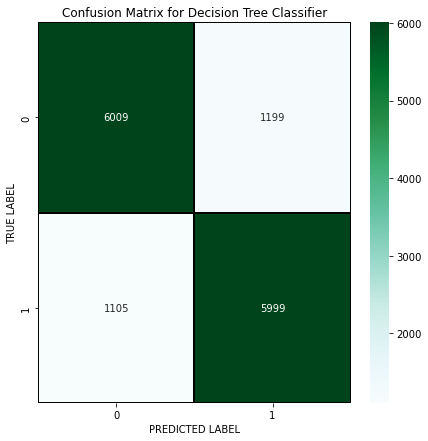

In [77]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Random Forest Classifier

In [78]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.881358300726663
[[6188 1020]
 [ 678 6426]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7208
           1       0.86      0.90      0.88      7104

    accuracy                           0.88     14312
   macro avg       0.88      0.88      0.88     14312
weighted avg       0.88      0.88      0.88     14312



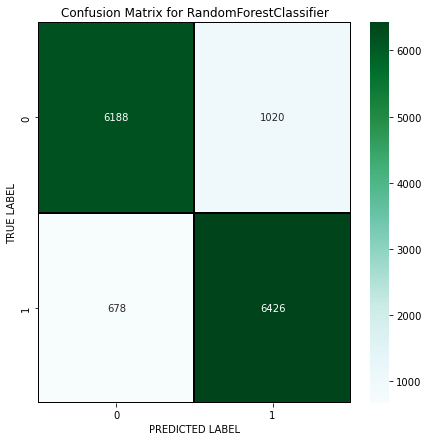

In [79]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# Logistic Regression

In [80]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.8012856344326439
[[5512 1696]
 [1148 5956]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      7208
           1       0.78      0.84      0.81      7104

    accuracy                           0.80     14312
   macro avg       0.80      0.80      0.80     14312
weighted avg       0.80      0.80      0.80     14312



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Classifier')

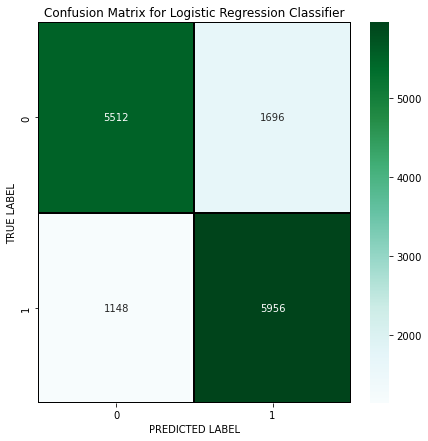

In [81]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')

# KNeighbors Classifier

In [82]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8420905533817775
[[5476 1732]
 [ 528 6576]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      7208
           1       0.79      0.93      0.85      7104

    accuracy                           0.84     14312
   macro avg       0.85      0.84      0.84     14312
weighted avg       0.85      0.84      0.84     14312



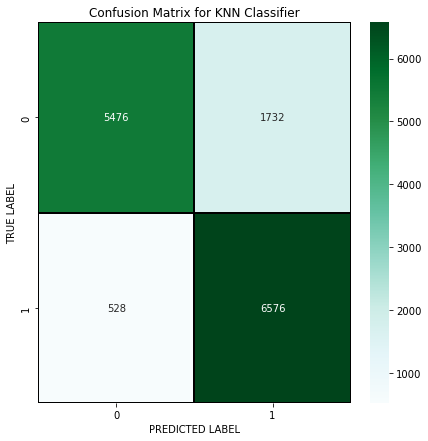

In [83]:
# Lets plot confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# Gradient Boosting Classifier

In [84]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8527110117384014
[[5829 1379]
 [ 729 6375]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      7208
           1       0.82      0.90      0.86      7104

    accuracy                           0.85     14312
   macro avg       0.86      0.85      0.85     14312
weighted avg       0.86      0.85      0.85     14312



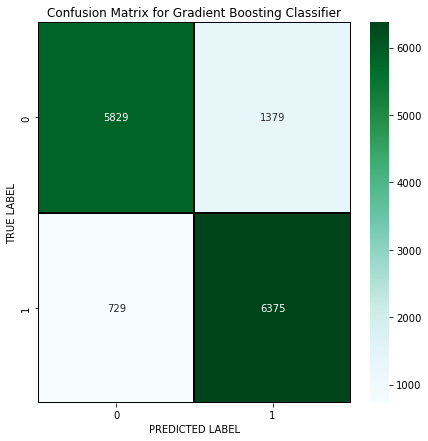

In [85]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# Checking the Cross Validation Score

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.8287866718954179


In [88]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8821546568724317


In [89]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.7949735359828098


In [90]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.8468121573780873


In [91]:
# cv score for  ExtraTreesClassifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.8461418888016332


From the difference between the accuracy score and the CV score we can conclude that Random Forest Classifier is our best fitting model.

# HYPER PARAMETER TUNING

In [92]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [93]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt","log2"]}

In [94]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [ ]:
Final_mod=RandomForestClassifier(criterion='gini',max_depth=25, max_features='auto', n_estimators=400)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

# ROC-AUC curve

In [ ]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(RFC,x_test,y_test)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# Saving The Model

In [ ]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Census_Income_Prediction.pkl")